# IMPORTAMOS LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

IMPORTAMOS SKLEARN

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# CARGAMOS EL DATASET

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.isna().sum().sum()

0

ANALISIS DE CORRELACIÓN

In [6]:
cols = ['DIS','INDUS','CRIM', 'RM', 'MEDV']
cols

['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']

<Axes: >

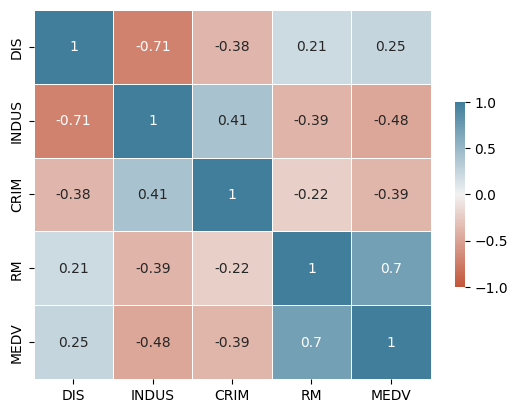

In [7]:
sns.heatmap(
    data=df[cols].corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

<Axes: xlabel='RM', ylabel='MEDV'>

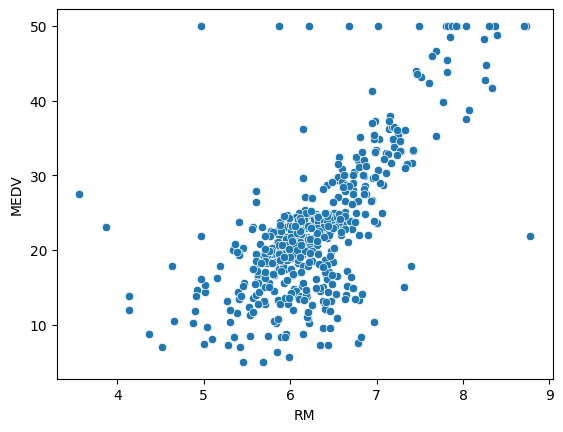

In [8]:
sns.scatterplot(data=df,x=df.RM,y=df.MEDV)

# CREANDO EL MODELO DE REGRESIÓN CON SCIKIT-LEARN

X = RM : promedio de habitaciones de un departamento
Y = MEDV : valor promedio del departamento

## ESTANDARIZAMOS LOS DATOS PARA EL MODELO

In [13]:
X = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values.reshape(-1, 1)

print(X)
print(y)


[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]
 [6.377]
 [6.009]
 [5.889]
 [5.949]
 [6.096]
 [5.834]
 [5.935]
 [5.99 ]
 [5.456]
 [5.727]
 [5.57 ]
 [5.965]
 [6.142]
 [5.813]
 [5.924]
 [5.599]
 [5.813]
 [6.047]
 [6.495]
 [6.674]
 [5.713]
 [6.072]
 [5.95 ]
 [5.701]
 [6.096]
 [5.933]
 [5.841]
 [5.85 ]
 [5.966]
 [6.595]
 [7.024]
 [6.77 ]
 [6.169]
 [6.211]
 [6.069]
 [5.682]
 [5.786]
 [6.03 ]
 [5.399]
 [5.602]
 [5.963]
 [6.115]
 [6.511]
 [5.998]
 [5.888]
 [7.249]
 [6.383]
 [6.816]
 [6.145]
 [5.927]
 [5.741]
 [5.966]
 [6.456]
 [6.762]
 [7.104]
 [6.29 ]
 [5.787]
 [5.878]
 [5.594]
 [5.885]
 [6.417]
 [5.961]
 [6.065]
 [6.245]
 [6.273]
 [6.286]
 [6.279]
 [6.14 ]
 [6.232]
 [5.874]
 [6.727]
 [6.619]
 [6.302]
 [6.167]
 [6.389]
 [6.63 ]
 [6.015]
 [6.121]
 [7.007]
 [7.079]
 [6.417]
 [6.405]
 [6.442]
 [6.211]
 [6.249]
 [6.625]
 [6.163]
 [8.069]
 [7.82 ]
 [7.416]
 [6.727]
 [6.781]
 [6.405]
 [6.137]
 [6.167]
 [5.851]
 [5.836]
 [6.127]
 [6.474]
 [6.229]
 [6.195]
 

In [14]:
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

print(X_std)
print(y_std)

[[ 4.13671889e-01]
 [ 1.94274453e-01]
 [ 1.28271368e+00]
 [ 1.01630251e+00]
 [ 1.22857665e+00]
 [ 2.07096381e-01]
 [-3.88410945e-01]
 [-1.60465557e-01]
 [-9.31205901e-01]
 [-3.99808215e-01]
 [ 1.31589471e-01]
 [-3.92684921e-01]
 [-5.63643963e-01]
 [-4.78164442e-01]
 [-2.68739617e-01]
 [-6.42000190e-01]
 [-4.98109663e-01]
 [-4.19753436e-01]
 [-1.18052117e+00]
 [-7.94438668e-01]
 [-1.01811008e+00]
 [-4.55369903e-01]
 [-2.03205317e-01]
 [-6.71918022e-01]
 [-5.13780909e-01]
 [-9.76794979e-01]
 [-6.71918022e-01]
 [-3.38547892e-01]
 [ 2.99699195e-01]
 [ 5.54713098e-01]
 [-8.14383890e-01]
 [-3.02931425e-01]
 [-4.76739783e-01]
 [-8.31479794e-01]
 [-2.68739617e-01]
 [-5.00958981e-01]
 [-6.32027579e-01]
 [-6.19205651e-01]
 [-4.53945244e-01]
 [ 4.42165063e-01]
 [ 1.05334363e+00]
 [ 6.91480331e-01]
 [-1.64739533e-01]
 [-1.04903869e-01]
 [-3.07205401e-01]
 [-8.58548308e-01]
 [-7.10383806e-01]
 [-3.62767089e-01]
 [-1.26172671e+00]
 [-9.72521003e-01]
 [-4.58219220e-01]
 [-2.41671102e-01]
 [ 3.2249373

## CREO EL MODELO DE REGRESIÓN LINEAL

In [16]:
slr = LinearRegression()
slr.fit(X_std,y_std)
slr.predict(X_std)

array([[ 2.87650863e-01],
       [ 1.35090673e-01],
       [ 8.91947718e-01],
       [ 7.06696059e-01],
       [ 8.54302996e-01],
       [ 1.44006529e-01],
       [-2.70085414e-01],
       [-1.11581321e-01],
       [-6.47523286e-01],
       [-2.78010619e-01],
       [ 9.15020479e-02],
       [-2.73057366e-01],
       [-3.91935436e-01],
       [-3.32496401e-01],
       [-1.86870766e-01],
       [-4.46421218e-01],
       [-3.46365509e-01],
       [-2.91879727e-01],
       [-8.20887138e-01],
       [-5.52420830e-01],
       [-7.07952971e-01],
       [-3.16645992e-01],
       [-1.41300839e-01],
       [-4.67224880e-01],
       [-3.57262666e-01],
       [-6.79224105e-01],
       [-4.67224880e-01],
       [-2.35412644e-01],
       [ 2.08398817e-01],
       [ 3.85725271e-01],
       [-5.66289938e-01],
       [-2.10646380e-01],
       [-3.31505750e-01],
       [-5.78177745e-01],
       [-1.86870766e-01],
       [-3.48346810e-01],
       [-4.39486664e-01],
       [-4.30570809e-01],
       [-3.1

# GRAFICAMOS LOS RESULTADOS

Text(0.5, 0, 'Promedio de habitaciones del deparamento(RM)')

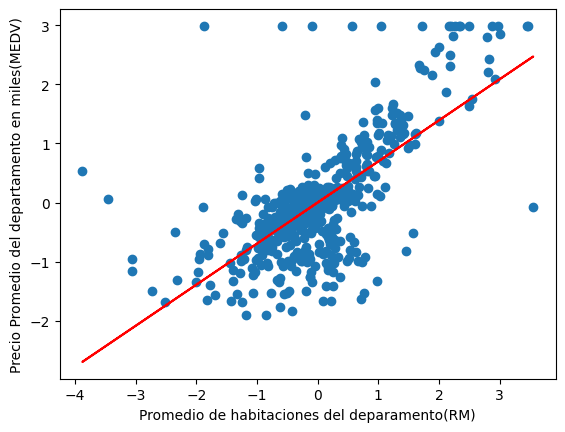

In [19]:
plt.scatter(X_std,y_std)
plt.plot(X_std,slr.predict(X_std),color='red')
plt.ylabel("Precio Promedio del departamento en miles(MEDV)")
plt.xlabel("Promedio de habitaciones del deparamento(RM)")

PROBANDO PREDICCIONES

In [20]:
num_habitaciones = 5
num_habitaciones_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1))
print("EL PRECIO DE UN DPTO CON 5 HABITACIONES ES DE :",sc_y.inverse_transform(slr.predict(num_habitaciones_std)))

EL PRECIO DE UN DPTO CON 5 HABITACIONES ES DE : [[10.83992413]]
